In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib import cm
from io import StringIO
import pandas as pd

In [3]:
mangaid = '1-269632'
nsa_z = 0.131457
BHMASS = []
plateifu = '9049-1901'

In [4]:
# open the file
data = fits.open('/Users/natachaupra/Downloads/manga-9049-1901-LOGCUBE.fits.gz')

In [5]:
# retrieve the flux density values
flux = np.transpose(data['FLUX'].data, axes = (2, 1, 0))

In [6]:
# retrieve the ivar values
ivar = np.transpose(data['IVAR'].data, axes = (2, 1, 0))

In [7]:
# retrieve the mask values 
mask = np.transpose(data['MASK'].data, axes = (2, 1, 0))

In [8]:
# retrieve the wave values 
wave = data['WAVE'].data

In [9]:
# sum flux density values element wise to get total flux density
n = len(flux)
sumflux = np.zeros(4563)
    
for i in range(n):
    for j in range(n):
        sumflux = np.add(sumflux, flux[i,j])

In [10]:
# check the redhsift
a = 5007 * (1 + nsa_z)

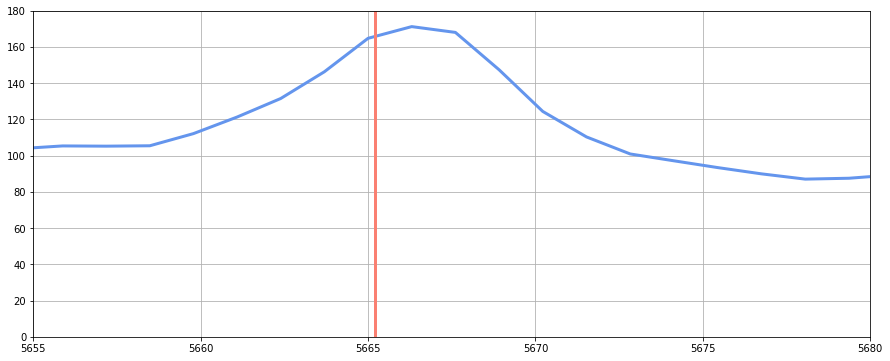

In [17]:
plt.figure(figsize = (15,6))
plt.grid()
plt.xlim(5655, 5680)
plt.ylim(0,180)
plt.plot(wave, sumflux, linewidth = 3, color = 'cornflowerblue')
plt.axvline(a, linewidth = 3, color = 'salmon')

In [18]:
# select peak region
yaxis = np.where(np.logical_and(wave > 5655, wave < 5680))[0]
print(yaxis)

# for i in yaxis:
#     print(wave[i])

[1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949
 1950 1951 1952 1953 1954]


In [19]:
flux_compare = [] 
ivar_compare = []

for i in yaxis:
    flux_compare.append(flux[:,:,i].flatten())
    ivar_compare.append(ivar[:,:,i].flatten())

flux_compare = np.array(flux_compare)
ivar_compare = np.array(ivar_compare)

len(flux_compare[0]), len(ivar_compare)

(1024, 19)

In [20]:
result = []
sumresult = []

for i in range(len(yaxis)):
    for j in range(len(flux)**2):
        sigma = np.sqrt(1 / ivar_compare[i][j]) if ivar_compare[i][j] != 0 else 0
        
        if flux_compare[i][j] < (3 * sigma):
            result.append(0)
        else:
            result.append(flux_compare[i][j])
    sumresult.append(np.sum(result))
    result = []

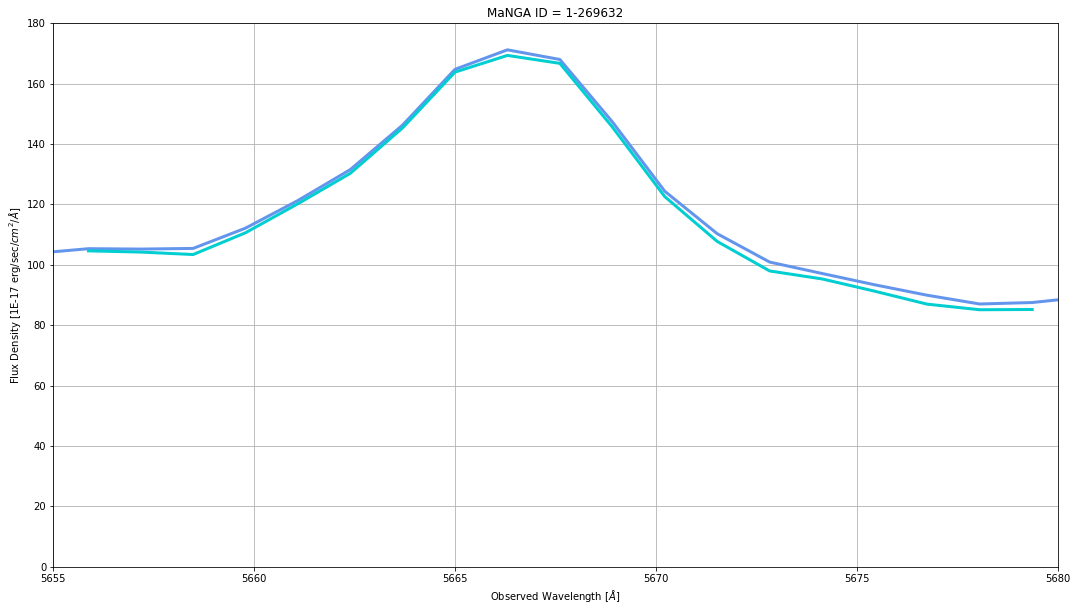

In [22]:
plt.figure(figsize = (18,10))
plt.grid()
plt.xlim(5655, 5680)
plt.ylim(0,180)
plt.xlabel('Observed Wavelength ' + r'[$\AA$]')
plt.ylabel('Flux Density [1E-17 erg/sec/'+r'$cm^2$/'+r'$\AA$]')
plt.title('MaNGA ID = ' + mangaid)
plt.plot(wave, sumflux, color = 'cornflowerblue', linewidth = 3)
plt.plot(wave[yaxis[0] : yaxis[-1] + 1], sumresult, color = 'darkturquoise', linewidth = 3)